In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob as gb
import os

%matplotlib inline

./Data/T4/Syrup\0.txt
./Data/T4/Syrup\12.txt
./Data/T4/Syrup\24.txt
./Data/T4/Syrup\36.txt
./Data/T4/Syrup\48.txt
./Data/T4/Syrup\60.txt
./Data/T4/Syrup\air.txt


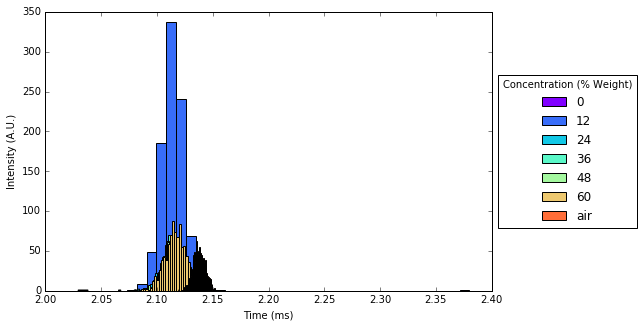

In [2]:
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from cycler import cycler
import re

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

ref = 'T4/Syrup/'
files = sorted(gb.glob('./Data/' + ref + '*.txt'), key=numericalSort)
# files = files[::-1]

NUM_COLORS = len(files)
cm = plt.get_cmap('rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

# Plot data
fig = plt.figure(figsize=(10.0,5.0))
ax = fig.add_subplot(111)
ax.set_prop_cycle(cycler('color', [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]))

avg = []
conc = []
stdd = []
for f in files:
    print(f)
    data = np.genfromtxt(fname=f, delimiter=' ', dtype=float)
    y = data[:, 1]
    t = data[:, 0]

    f = os.path.basename(f)
    f =  os.path.splitext(f)[0]
    ax.hist(y, bins=40, label=f)
#     ax.axvline(y.mean(), linestyle='dashed', linewidth=2)
    conc.append(f)
    avg.append(y.mean())
    stdd.append(y.std())


ax.ticklabel_format(useOffset=False)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', title='Concentration (% Weight)', bbox_to_anchor=(1, 0.5))

plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')
# plt.xlim([9.88, 9.98])

plt.savefig('./Data/' + ref + 'Histogram.png', dpi=1000)
plt.show()

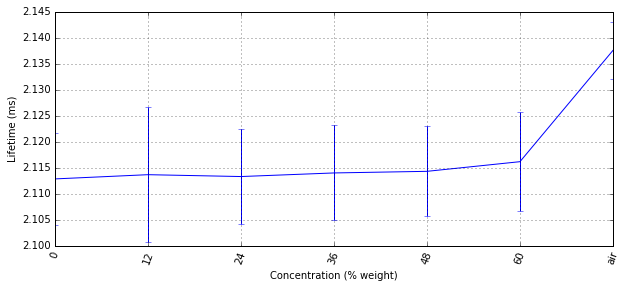

In [3]:
fig = plt.figure(figsize=(10.0,5.0))
ax = fig.add_subplot(111)

x = np.arange(len(conc))
plt.xticks(x, conc, rotation=70)
ax.ticklabel_format(useOffset=False, axis='y')
ax.errorbar(x, avg, yerr=stdd)
plt.grid()
plt.gcf().subplots_adjust(bottom=0.25)
# plt.xlabel('Concentration (mM)')
plt.xlabel('Concentration (% weight)')
plt.ylabel('Lifetime (ms)')
plt.savefig('./Data/' + ref + 'avg_error_vs_lifetime.png', dpi=1000)